#### D209 - Classification Analysis
azaheer@wgu.edu

### Part I: Research Question
#### A.  Describe the purpose of this data mining report by doing the following:
1.  Propose one question relevant to a real-world organizational situation that you will answer using one of the following classification methods:

    - k-nearest neighbor (KNN)

    A. I will use the KNN and the following predictors to identify which customer are at high risk of churn?
        • Children
        • Income
        • Tenure
        • Bandwidth_GB_Year
        • Age

2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

    A. The stakeholders can review the data provided by the analysis and create incentives to keep the customers that are likely to terminate their contracts with the company. This will lead to a lower churn rate.

### Part II: Method Justification
#### B.  Explain the reasons for your chosen classification method from part A1 by doing the following:
1.  Explain how the classification method you chose analyzes the selected data set. Include expected outcomes.

    K-Nearest Neighbours (KNN) is one of the simplest algorithms for classifying data items. It classifies new data points based on similarity measures i.e., distance function. The data items are classified by a majority vote to its neighbours.

    Expected outcomes: The data will be classified based on their distance to predict their 'Churn' status 'Y' or 'N'.

2.  Summarize one assumption of the chosen classification method.
    
    A. The classifier assumes that similar things are near to each other; that is, they are nearby. 
    Chatterjee, M. (2021, April 19)

3.  List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.
    
    A. I will utilize Python due to my previous interaction with it and its Pandas, matplotlib and Scipy modules. Additionally, I will be using Jupyter notebook as the IDE because it provides a user-friendly experience. Pandas is an excellent package for working with data set as it makes it easy to load and manipulate columns and/or rows to replace null values. Matplotlib plot is an easy way to create graphs for identifying outliers using histograms and/or boxplots.

### Part III: Data Preparation
#### C.  Perform data preparation for the chosen data set by doing the following:
1.  Describe one data preprocessing goal relevant to the classification method from part A1.

    A. I will convert all the categorical data to binary to perform the classification analysis.

 2.  Identify the initial data set variables that you will use to perform the analysis for the classification question from part A1, and classify each variable as continuous or categorical. 
 
     ##### Categorical Predictor:
     • Churn
    
     ##### Continuous Predictor:    
     • Children
     • Income
     • Tenure
     • Bandwidth_GB_Year
     • Age

 3.  Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.
     
     
     1. Import dataset to a DataFrame in Pandas.
     2. Review the summary statistics of DataFrame, structure & data types.
     3. Remove irrelevant columns from the DataFrame "Customer_id", "zip code".
     4. Split the training and test data
     5. Load and fit the KNN classifier
     6. Review the KNN training score
     7. Find ideal testing and training accuracy
     8. Provide AUC score
     9. provide a copy of the prepared dataset "prepared_dataset.csv" for use in KNN model

In [1]:
import pandas as pd
import numpy as np
import jedi

# Visual libraries
import matplotlib.pyplot as plt

#Show all Columns and Rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Load data set
df = pd.read_csv('churn_clean.csv')

# Amend columns with no names
df = df.rename(columns=({ 'Item1': 'Timely_Response', 'Item2':'Timely_Fixes', 'Item3':'Timely_Replacements', 
                         'Item4':'Reliability', 'Item5':'Options', 'Item6':'Respectful_Response',
                         'Item7':'Courteous_Exchange', 'Item8':'Evidence_of_active_listening'}))

In [2]:
# Validate there are no nulls
df.isnull().sum()

CaseOrder                       0
Customer_id                     0
Interaction                     0
UID                             0
City                            0
State                           0
County                          0
Zip                             0
Lat                             0
Lng                             0
Population                      0
Area                            0
TimeZone                        0
Job                             0
Children                        0
Age                             0
Income                          0
Marital                         0
Gender                          0
Churn                           0
Outage_sec_perweek              0
Email                           0
Contacts                        0
Yearly_equip_failure            0
Techie                          0
Contract                        0
Port_modem                      0
Tablet                          0
InternetService                 0
Phone         

In [3]:
# DataFrame statistics
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Evidence_of_active_listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [4]:
# Dropping columns that I think are not relavant to the analysis
df = df.drop(columns= ["CaseOrder", "Customer_id","Interaction", "UID", "City", "State", 
                            "Techie","PaperlessBilling","Yearly_equip_failure","County", "Zip", "Lat", "Lng",
                            "Area", "TimeZone", "Job", "PaymentMethod", "DeviceProtection",
                            "OnlineBackup","OnlineBackup","OnlineBackup", "OnlineBackup","Port_modem","OnlineSecurity", 
                            "Multiple","Phone","TechSupport","Contract","Tablet","InternetService", "StreamingTV", "StreamingMovies"
                           ,"MonthlyCharge","Email", "Contacts","Population", "Outage_sec_perweek","Timely_Response", "Timely_Fixes", "Timely_Replacements",
                           "Reliability","Marital", "Gender","Options", "Respectful_Response",  "Courteous_Exchange", "Evidence_of_active_listening" 
                           ])

In [5]:
# display data set with all the columns
df.head(n=3)

,Children,Age,Income,Churn,Tenure,Bandwidth_GB_Year
0,0,68,28561.99,No,6.795513,904.536110
1,1,27,21704.77,Yes,1.156681,800.982766
2,4,50,9609.57,No,15.754144,2054.706961


### Part IV: Analysis
#### D.  Perform the data analysis and report on the results by doing the following:
1.  Split the data into training and test data sets and provide the file(s).

In [6]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [7]:
# Data conversion
df['Churn'] = [1 if v == 'Yes' else 0 for v in df['Churn']]

# Feature Selection
X = df.drop('Churn', axis=1).values
y = df['Churn']

# Data split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.02, random_state=21)

2.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.

I used the KNN with n_neighbors parameters set to 6 to perform the analysis, then I printed out the shape of the training data and then stored the prediction in the y_pred. Lastly, print out the training accuracy of the model by using the score function.

Here is an example, the ‘green dot’ should be classified as either blue squares or red triangles. If k = 3 ‘solid line circle’, it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 ‘dashed line circle’, it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).

In [8]:
from IPython.display import Image
Image(url= "knn_image.png", width=400, height=400)

In [9]:
# Train the model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [10]:
# Prediction
y_pred = knn.predict(X_test)

In [11]:
# Accuracy Score of the training set
knn.score(X_test, y_test)

0.745

In [12]:
# Setup hyperparameters selection for the KNN
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # K-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

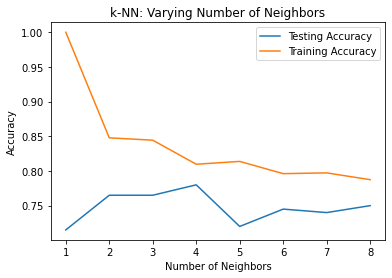

In [13]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Above analysis shows that the ideal neigbhours setting is 4 with the testing accuracy of 0.78 and the training accuracy at .81

In [14]:
# Compute classification metrics after scaling
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       155
           1       0.41      0.29      0.34        45

    accuracy                           0.74       200
   macro avg       0.61      0.58      0.59       200
weighted avg       0.72      0.74      0.73       200



In [15]:
# Import sklearn confusion_matrix & generate results
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[136  19]
 [ 32  13]]


3.  Provide the code used to perform the classification analysis from part D2.

In [16]:
# Re-insatiate the classifier with an ideal value of 4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Prediction
y_pred = knn.predict(X_test)

# Accuracy Score
knn.score(X_test, y_test)

0.78

### Part V: Data Summary and Implications
#### E.  Summarize your data analysis by doing the following:
1.  Explain the accuracy and the area under the curve (AUC) of your classification model.

In [17]:
# Import ROC AUC  
from sklearn.metrics import roc_auc_score

# Fit the data
knn.fit(X, y)

# Predicted probabilities
y_predicted_probabilities = knn.predict_proba(X_test)[:,1]

# AUC score
print("The Area under curve (AUC) is: {:.4f}".format(roc_auc_score(y_test, y_predicted_probabilities)))

The Area under curve (AUC) is: 0.8929


2.  Discuss the results and implications of your classification analysis.

The AUC score informs us how well is our model at predicting the correct label for 'Churn’. The value is scaled from 0 to 1 being the most accurate. This KNN model has a score of '0.8929' which means the model is adequate at predicting the Churn rate but could perform better if further analysis is performed on the independent variables.

3.  Discuss one limitation of your data analysis.

Starting with an arbitrary choice of k = 6 nearest neighbours will yield dramatically different results. As shown above that a consideration must be observed and a systematic approach of trial and test must be tried to increase the accuracy of the prediction. I have also noticed that limiting the number of the independent variable to a select few can improve the performance considerably and reduce the memory and computational load which could lead to slow performance.

4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.

The predictor variables create a low accuracy score of ‘0.89’. The stakeholders need to further invest in market analysis to identify competitive services and the marketing team needs to come up with products and services that will create an eco-system for the customer which will decrease the churn rate.

### Part VI: Demonstration
#### F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.
 
Note: The audiovisual recording should feature you visibly presenting the material (i.e., not in voiceover or embedded video) and should simultaneously capture both you and your multimedia presentation.
 
Note: For instructions on how to access and use Panopto, use the "Panopto How-To Videos" web link provided below. To access Panopto's website, navigate to the web link titled "Panopto Access," and then choose to log in using the “WGU” option. If prompted, log in using your WGU student portal credentials, and then it will forward you to Panopto’s website.
 
To submit your recording, upload it to the Panopto drop box titled “Data Mining I – NVM2.” Once the recording has been uploaded and processed in Panopto's system, retrieve the URL of the recording from Panopto and copy and paste it into the Links option. Upload the remaining task requirements using the Attachments option.

Panapto: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b83de77d-6f5b-4c82-afd3-ae1501858242

G.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.

```{bibliography}
Pandas. (2021). Pandas DataFrames. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

Get started with references. (2021). Jupyterbook. https://jupyterbook.org/tutorials/references.html#tutorials-references

Marques, A. M. (2020, March 11). How to show all columns / rows of a Pandas Dataframe? Towards Data Science. https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf

Starmer, J. (2018, March 5). StatQuest: Logistic Regression. YouTube. https://www.youtube.com/watch?v=yIYKR4sgzI8&t=121s

V. (2019, July 21). Pandas: Apply a function to single or selected columns or rows in Dataframe. ThisPointer. https://thispointer.com/pandas-apply-a-function-to-single-or-selected-columns-or-rows-in-dataframe/

Wijaya, C. Y. (2021, December 15). 5 Must-Know Dimensionality Reduction Techniques via Prince. Medium. https://towardsdatascience.com/5-must-know-dimensionality-reduction-techniques-via-prince-e6ffb27e55d1

Chatterjee, M. (2021, April 19). A Quick Introduction to KNN Algorithm. GreatLearning Blog: Free Resources What Matters to Shape Your Career! https://www.mygreatlearning.com/blog/knn-algorithm-introduction/
```

H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

```{bibliography}
Chantal D. Larose, & Daniel T. Larose. (2019). Data Science Using Python and R. Wiley.

```